# Thuật toán và Biểu diễn

In [ ]:
from PriorityQueue import PriorityQueue
from Cell import Position, Cell

from typing import Iterable, Optional

def chebyshev_move(start: Position, end: Position) -> tuple[list[int], list[int]]:
    cur_x, cur_y = start
    xs = [cur_x]
    ys = [cur_y]

    while (cur_x != end.x) or (cur_y != end.y):
        dx = end.x - cur_x
        dy = end.y-cur_y
        if abs(dx) == abs(dy):
            # cur_x > end.x -> decrease x
            if dx < 0: cur_x -= 1
            else: cur_x += 1

            #cur_y > end.y -> decrease y
            if dy < 0: cur_y -= 1
            else: cur_y += 1
        elif abs(dx) < abs(dy):
            if dy < 0: cur_y -= 1
            elif dy > 0: cur_y += 1
        else:
            if dx < 0: cur_x -= 1
            elif dx > 0: cur_x += 1
        xs.append(cur_x)
        ys.append(cur_y)
    return xs, ys

def path_traceback(start_state: Cell, goal_state: Cell) -> list[Cell]:
    path = []
    while goal_state != start_state:
        path.append(goal_state)
        goal_state = goal_state.parent
    path.append(start_state)
    return list(reversed(path))

def astar_vacuum(grid_dim: tuple[int, int],
                 dirty_cells: Iterable[Position],
                 start: Position, *,
                 do_traceback: bool = False)\
                -> tuple[Cell, Optional[list[Cell]]]:
    my_queue: PriorityQueue[Cell] = PriorityQueue()

    start_node = Cell(position=start, grid_dim=grid_dim, dirty_cells=dirty_cells)
    my_queue.push(start_node)
    while my_queue:
        cur = my_queue.pop()

        if len(cur.dirty_cells) == 0: break
        
        for neighbour in cur.expand_cell():
            if my_queue.get_attr(neighbour, 'cost', default_value=neighbour.cost + 1) > neighbour.cost:
                my_queue.push(neighbour)

    traceback = path_traceback(start_node, cur) if do_traceback else None
    return cur, traceback

In [2]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def show_animation(grid_dim:tuple[int, int], dirty_cells: set[Position],
                   xs: list[int], ys: list[int],
                   figure = plt.gcf()) -> None:
    figure.clear()
    ax = figure.add_subplot(xlim=(1, grid_dim[1] + 1), ylim=(1, grid_dim[0] + 1))
    ax_pos = ax.get_position()
    ax.set_aspect('equal')

    ax.vlines([i for i in range(1, grid_dim[1] + 1)],
              ymin=1, ymax=grid_dim[0] + 1, colors=(0, 0, 0, 0.2))
    ax.hlines([i for i in range(1, grid_dim[0] + 1)],
              xmin=1, xmax=grid_dim[1] + 1, colors=(0, 0, 0, 0.2))

    for tick in ax.xaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)
    for tick in ax.yaxis.get_major_ticks():
        tick.tick1line.set_visible(False)
        tick.tick2line.set_visible(False)
        tick.label1.set_visible(False)
        tick.label2.set_visible(False)


    # path trace
    ax.plot([x + 0.5 for x in xs], [y + 0.5 for y in ys], '--', color=(0, 0, 1, 0.2))
    robot, = ax.plot([], [], 's', color=(34 / 255, 139 / 255, 34 / 255))
    dirty, = ax.plot([cell.x + 0.5 for cell in dirty_cells],
                     [cell.y + 0.5 for cell in dirty_cells], 'X', color=(1, 0, 0, 0.5))


    clean_costs = [1]
    cur_costs = [0]
    first = True
    for x, y in zip(xs[1:], ys[1:]):
        if (x, y) in dirty_cells and not first:
            first = True
            cur_costs.append(cur_costs[-1] + clean_costs[-1])
            clean_costs.append(clean_costs[-1])
        else:
            if (x, y) in dirty_cells: first = False
            clean_costs.append(clean_costs[-1] + 1)
            cur_costs.append(cur_costs[-1] + 1)
    
    cost_format = lambda clean, cur: f'Clean cost: {clean}\nCurrent cost: {cur}'
    cost_txt = figure.text(ax_pos.xmin - 0.1, ax_pos.ymax - 0.06,
                           cost_format(clean_costs[0], cur_costs[0]))
    first = True
    def animate(i):
        nonlocal dirty_cells, first
        
        if (xs[i], ys[i]) in dirty_cells and not first:
            dirty_cells = dirty_cells - {(xs[i], ys[i])}
            dirty.set_data([cell.x + 0.5 for cell in dirty_cells],
                           [cell.y + 0.5 for cell in dirty_cells])
            first = True
        elif (xs[i], ys[i]) in dirty_cells: first = False

        cost_txt.set_text(cost_format(clean_costs[i], cur_costs[i]))
        robot.set_data([xs[i] + 0.5], [ys[i] + 0.5])
        return robot, dirty


    ani = FuncAnimation(figure, animate, len(ys), interval=500, blit=True)
    return HTML(ani.to_jshtml())

<Figure size 640x480 with 0 Axes>

# <center>Chương trình<center>

In [3]:
from random import randint

In [4]:
dirty = {Position(1, 1),
         Position(1, 6),
         Position(3, 8),
         Position(5, 8),
         Position(8, 6)}
start = Position(4, 5)
grid_dim = (10, 8)
dirty_no = 10

In [ ]:
grid_dim = None
start = None
dirty_no = 0
dirty = set()
while not grid_dim or not start or not dirty_no:
    while not grid_dim:
        user_in = input("What is the grid dimension? (row, col): ")
        user_in = user_in.split(',')
        try:
            rows = int(user_in[0][1:])
            cols = int(user_in[1][:-1])
            grid_dim = (rows, cols)
        except ValueError:
            print("Incorrect format! Please specify number of rows and columns in grid as '(rows, cols)'")
    while not start:
        user_in = input("Where is the start position? (x, y): ")
        user_in = user_in.split(',')
        try:
            x = int(user_in[0][1:])
            y = int(user_in[1][:-1])
            if x < 1 or y < 1: raise ValueError()
            start = Position(x, y)
        except ValueError:
            print("Invalid input! Please specify start position in grid as '(x, y)' where x, y >= 1")
    while not dirty_no:
        user_in = input("How many dirty cells are there? ")
        try:
            dirty_no = int(user_in)
            if dirty_no < 1: raise ValueError()
        except ValueError:
            print("Invalid input! Number of dirty cells must be integer >= 1")
            dirty_no = 0
while len(dirty) != dirty_no:
    dirty.add(Position(randint(1, grid_dim[1]),
                       randint(1, grid_dim[0])))

In [5]:
goal = astar_vacuum(grid_dim, dirty, start, do_traceback=True)
print(f"Total cost: {goal[0].cost}")

Total cost: 64


In [6]:
for i, cell in enumerate(goal[1]):
    if i == 0: action = 'Start at'
    elif cell.action == 'move': action = "Move to"
    else: action = "Suck"
    print(f"{action} cell {cell.position} with cost {cell.cost}")

Start at cell (4, 5) with cost 0
Move to cell (3, 6) with cost 1
Move to cell (2, 5) with cost 2
Move to cell (1, 6) with cost 3
Suck cell (1, 6) with cost 7
Move to cell (2, 7) with cost 8
Move to cell (3, 8) with cost 9
Suck cell (3, 8) with cost 15
Move to cell (4, 7) with cost 16
Move to cell (5, 8) with cost 17
Suck cell (5, 8) with cost 25
Move to cell (6, 7) with cost 26
Move to cell (7, 6) with cost 27
Move to cell (8, 6) with cost 28
Suck cell (8, 6) with cost 39
Move to cell (7, 6) with cost 40
Move to cell (6, 6) with cost 41
Move to cell (5, 5) with cost 42
Move to cell (4, 4) with cost 43
Move to cell (3, 3) with cost 44
Move to cell (2, 2) with cost 45
Move to cell (1, 1) with cost 46
Suck cell (1, 1) with cost 64


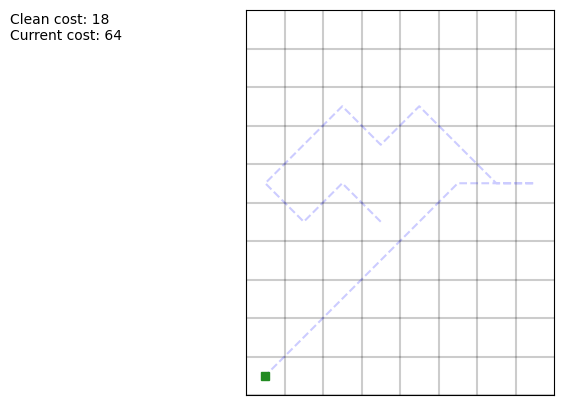

In [7]:
xs = [cell.position.x for cell in goal[1]]
ys = [cell.position.y for cell in goal[1]]
# for i, cell in enumerate(goal[1][:-1]):
#     temp_x, temp_y = chebyshev_move(cell.position, goal[1][i + 1].position)
#     xs.extend(temp_x)
#     ys.extend(temp_y)
# xs.append(goal[0].position.x)
# ys.append(goal[0].position.y)
fig = plt.figure(figsize=(8, 5))
show_animation(grid_dim, dirty, xs, ys, fig)